## Heart Disease DataSet 

Data obtained from kaggle 
https://www.kaggle.com/datasets/zeeshanmulla/heart-disease-dataset?select=Heart+Disease+Dataset.csv

We are going to construct a decision tree to try to predict people who was suffer (or not) heart disease based on the feature of this data 

**Here is the information of this DataSet**

age = age in years

sex = (1 = male; 0 = female)

cp= chest pain type

trestbps= resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-4) colored by flouroscopy

thal3 = normal; 6 = fixed defect; 7 = reversable defect

target = 1 or 0 (1=True, 0=False)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hd_data=pd.read_csv('Heart_Disease_Dataset.csv')

In [3]:
hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### EDA

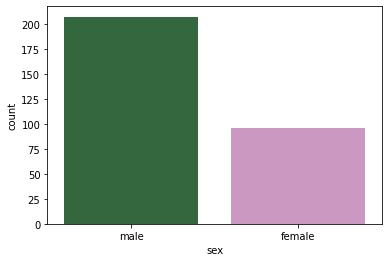

In [5]:
sns.countplot(x=hd_data['sex'].map({1:'male',0: 'female'}),data=hd_data, palette='cubehelix')

There are more male data than female data

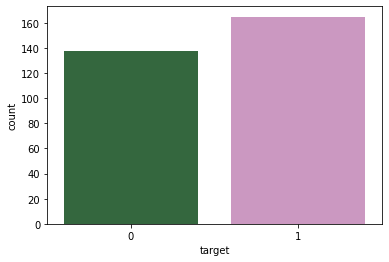

In [6]:
sns.countplot(x=hd_data['target'],data=hd_data,palette='cubehelix')

DataSet is balanced

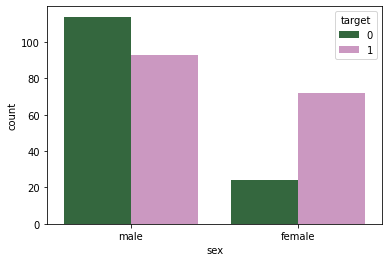

In [7]:
sns.countplot(x=hd_data['sex'].map({1:'male',0: 'female'}),data=hd_data,hue='target',palette='cubehelix')

Distribution of male and female by age

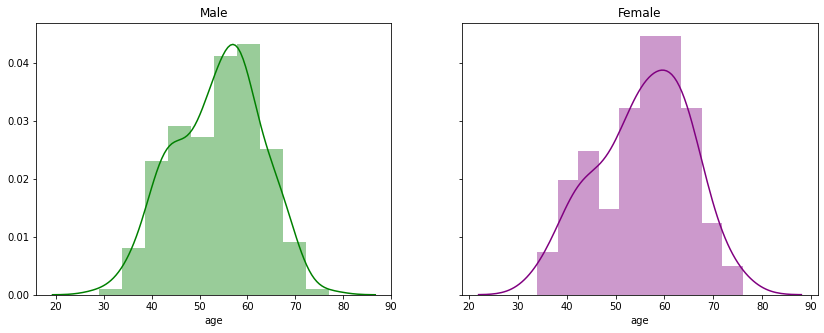

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('Male')
sns.distplot(hd_data[hd_data['sex']==1]['age'],bins=10,ax=ax1,color='green')
ax2.set_title('Female')
sns.distplot(hd_data[hd_data['sex']==0]['age'],bins=10,ax=ax2,color='purple')

The mean values for continuos variables by sex

In [9]:
hd_data.groupby('sex')[['age','trestbps','chol','thalach','oldpeak']].mean()

,age,trestbps,chol,thalach,oldpeak
sex,,,,,
0,55.677083,133.083333,261.302083,151.125000,0.876042
1,53.758454,130.946860,239.289855,148.961353,1.115459


Plot of cholesterol means by chest pain type and hue='target'

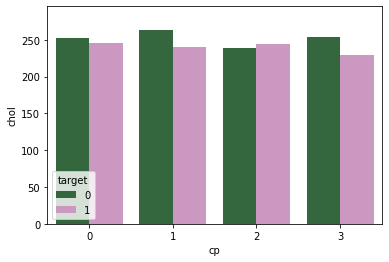

In [10]:
p=sns.barplot(x='cp',y='chol', data=hd_data, hue='target',errwidth=0,palette='cubehelix')


In our dataSet

In [11]:
hd_data.groupby(['target','cp']).mean()[['chol','trestbps']]

chol    trestbps
target cp                        
0      0   251.932692  133.692308
       1   263.444444  138.444444
       2   239.000000  135.055556
       3   253.714286  138.000000
1      0   245.333333  127.564103
       1   240.682927  126.195122
       2   244.260870  129.159420
       3   229.875000  142.125000

Distribution of 'trestbps' (resting blood pressure in mm Hg on admission to the hospital) by sex

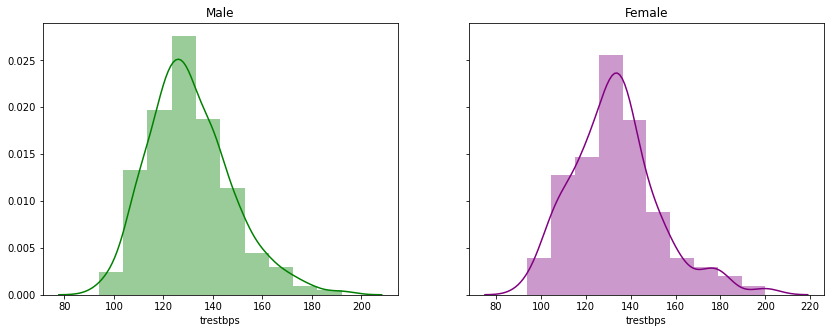

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('Male')
sns.distplot(hd_data[hd_data['sex']==1]['trestbps'],bins=10,ax=ax1,color='green')
ax2.set_title('Female')
sns.distplot(hd_data[hd_data['sex']==0]['trestbps'],bins=10,ax=ax2,color='purple')

Distribution of 'trestbps' by target (heart disease)

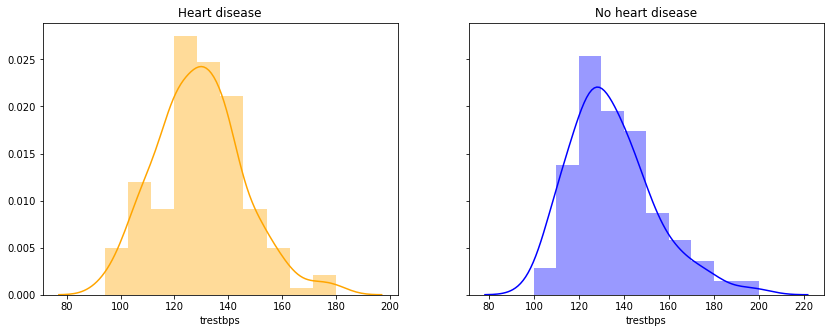

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('Heart disease')
sns.distplot(hd_data[hd_data['target']==1]['trestbps'],bins=10,ax=ax1,color='orange')
ax2.set_title('No heart disease')
sns.distplot(hd_data[hd_data['target']==0]['trestbps'],bins=10,ax=ax2,color='blue')

In [14]:
hd_data.groupby('target')[['age','trestbps','chol','thalach','oldpeak']].mean()

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507
1,52.496970,129.303030,242.230303,158.466667,0.583030


countplot of 'fbs' (fasting blood sugar ) by 'target' (heart disease)

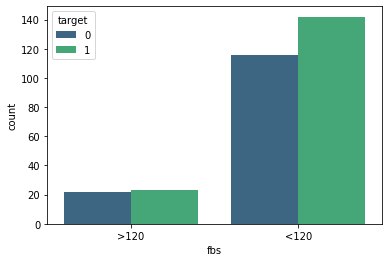

In [15]:
sns.countplot(x=hd_data['fbs'].map({1:'>120',0: '<120'}),data=hd_data,hue='target',palette='viridis')

countplot of 'ca' (number of major vessels (0-3) colored by flouroscopy) by 'target' (heart disease)

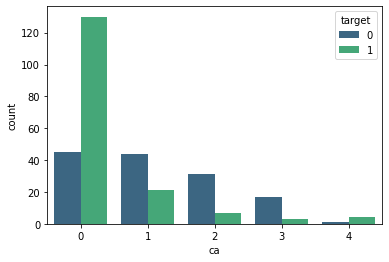

In [16]:
sns.countplot(x=hd_data['ca'],data=hd_data,hue='target',palette='viridis')

It seems that doesn't to see major vessels colored is bad

**Correlations by sex**

In [17]:
hd_data.groupby('sex').corr()['target']

sex          
0    age        -0.207531
     cp          0.522233
     trestbps   -0.391957
     chol       -0.121769
     fbs        -0.218218
     restecg     0.032553
     thalach     0.252103
     exang      -0.486509
     oldpeak    -0.500454
     slope       0.458207
     ca         -0.487205
     thal       -0.493197
     target      1.000000
1    age        -0.290993
     cp          0.407136
     trestbps   -0.065489
     chol       -0.175665
     fbs         0.057675
     restecg     0.168234
     thalach     0.485584
     exang      -0.393720
     oldpeak    -0.393169
     slope       0.311255
     ca         -0.339703
     thal       -0.255058
     target      1.000000
Name: target, dtype: float64

heat map of the entire correlations

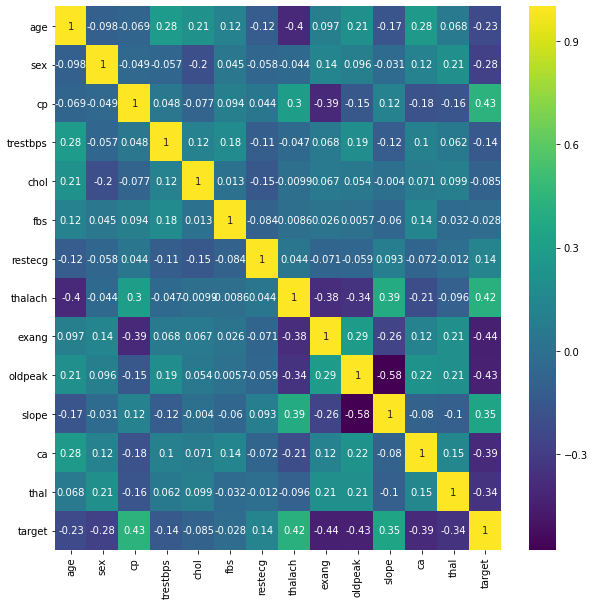

In [18]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(hd_data.corr(),annot=True,cmap='viridis')

## Decision tree

**Train test split**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=hd_data.drop('target', axis=1)
y=hd_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Fitting to the training data**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
D_tree=DecisionTreeClassifier()

In [23]:
D_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predictions and Evaluation**

In [24]:
predictions=D_tree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[34  8]
 [14 35]]


              precision    recall  f1-score   support

           0       0.71      0.81      0.76        42
           1       0.81      0.71      0.76        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



Let's se if we can improve this with a random forest

In [27]:
from sklearn import tree

In [28]:
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
          'oldpeak','slope','ca','thal']

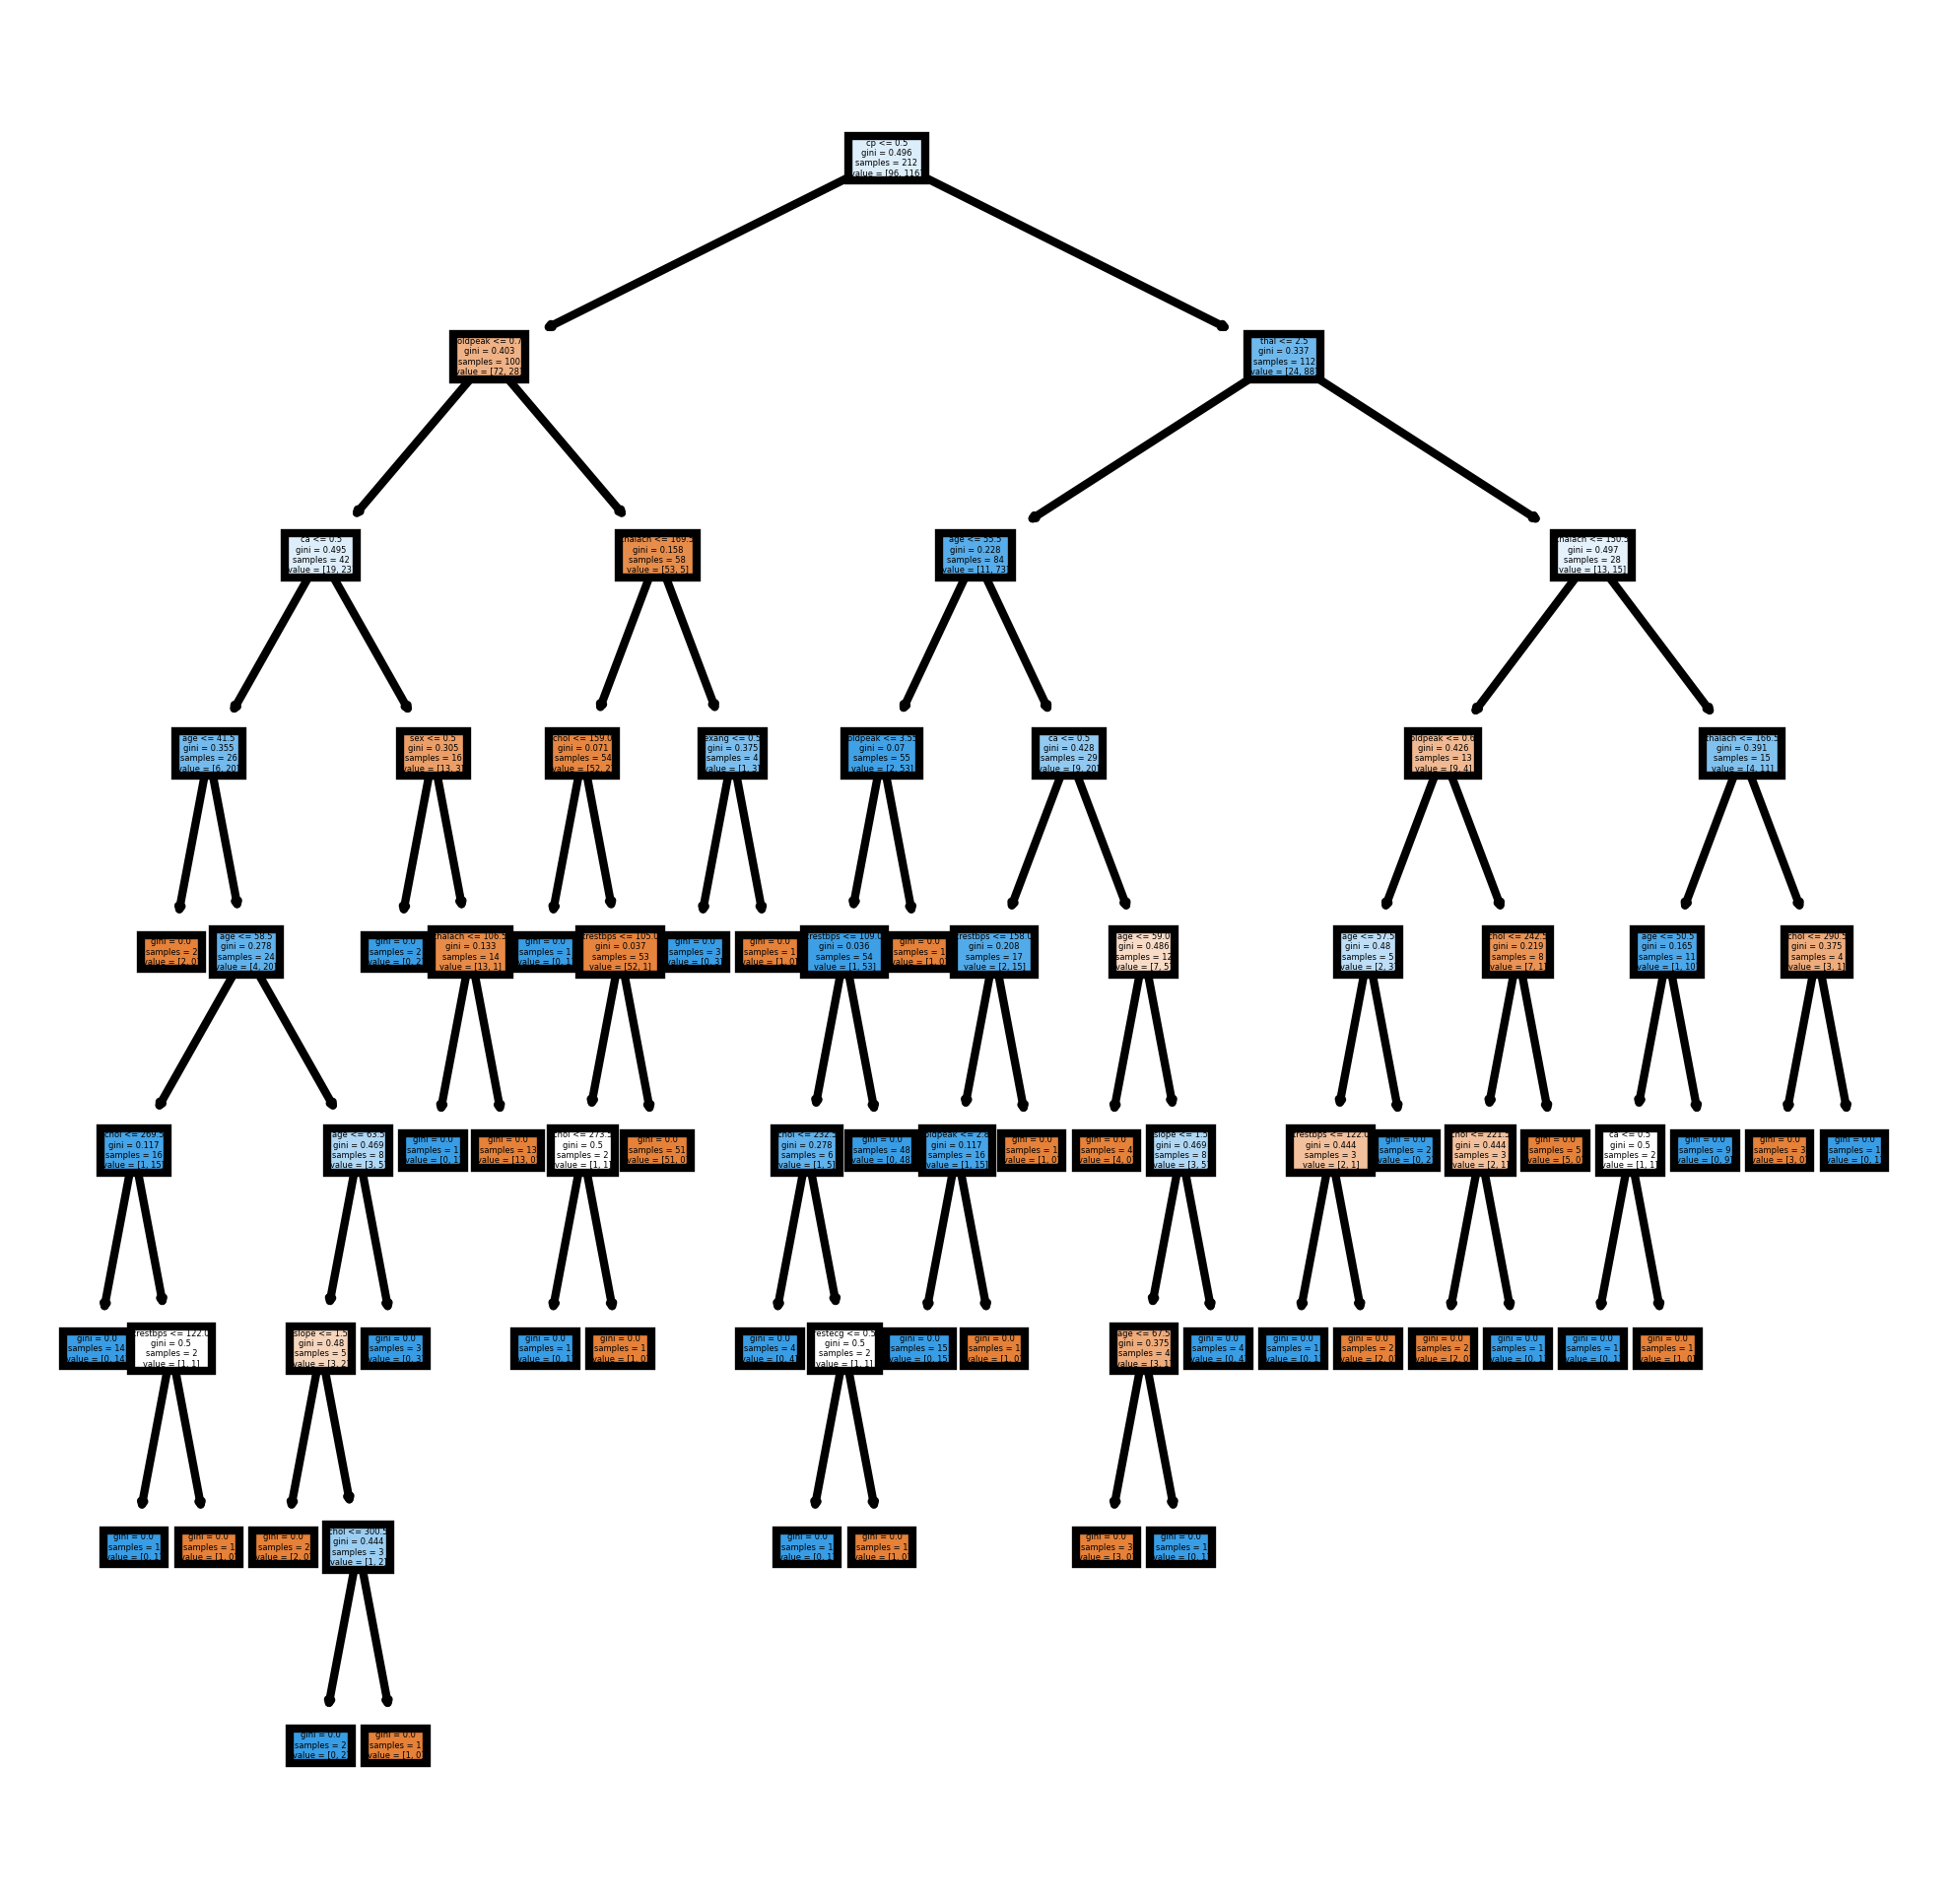

In [68]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600) 
#### demasiadas características para vizualizarlo####
tree.plot_tree(D_tree,
               feature_names = features,
               filled = True);
fig.savefig('tree_hd.png')

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
random_forest=RandomForestClassifier(n_estimators=20)

In [65]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
random_forest_pred=random_forest.predict(X_test)

In [67]:
print(confusion_matrix(y_test,random_forest_pred))
print('\n')
print(classification_report(y_test,random_forest_pred))

[[36  6]
 [ 6 43]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.88      0.88      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



**Let's see which n_estimator (number of trees) help us to improve accuracy** 

In [59]:
from sklearn.metrics import accuracy_score

scores_n =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores_n.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

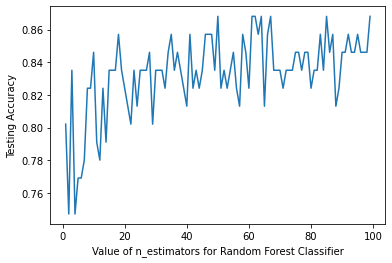

In [60]:
plt.plot(range(1,100), scores_n)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [61]:
scores_n.index(max(scores_n))

49

In [63]:
scores_n[49]

0.8681318681318682

Accuracy oscillates more o less between 0.800 and 0.860 (with exceptions and it depends in the ensamble) for more than one decision tree so a number of estimators >10 improve a bit the results.